## Combining Machine Learning and Optimization 
## With Gurobi and sklearn

## Machine Learning topics 
Touching the elephant here, but ~~not there~~

Supervised Learning
  * Algorithm selection and hyper-parametric optimization
  * KFold assessment vs overfitting
  * Separating training from prediction 

~~Unsupervised Learning~~

~~Time Series Data~~

~~Deep Learning~~

## Optimization topics

  * Exploratory programming to application deployment
  * Coping with the combinatorial explosion
  * Validating optimization with simulation

# All Under the Banner of Python!

## The Soda Promotion Problem

We have the challenge of designing the upcoming promotion campaign for a Soda Company. The intended objective is to bolster sales while at the same time obeying various business constraints.

## The First Challenge

We need to predict impact of different price points on the expected sales for each type of soda.

To do this, we need to train a soda sales predictor from a historical data table.


### Examine historical data 

In [1]:
import pandas
df_hist = pandas.read_excel("soda_sales_historical_data.xlsx")
df_hist[10:]

,Product,Sales,Cost Per Unit,Easter Included,Super Bowl Included,Christmas Included,Other Holiday,4 Wk Avg Temp,4 Wk Avg Humidity,Sales M-1 weeks,Sales M-2 weeks,Sales M-3 weeks,Sales M-4 Weeks,Sales M-5 weeks
10,Alpine Stream,135.7,2.0775,No,No,Yes,No,80.94,69.33,1.9,2.4,2.2,2.0,1.4
11,Bright,3054.8,1.3425,No,No,Yes,No,80.94,69.33,473.4,301.8,188.8,101.4,81.6
12,Crisp Clear,50.3,1.6000,No,No,Yes,No,80.94,69.33,42.2,73.8,69.4,72.8,75.4
13,Popsi Kola,347.9,1.7650,No,No,Yes,No,80.94,69.33,22.9,23.1,22.6,22.1,19.9
14,DC Kola,979.3,1.9250,No,No,Yes,No,80.94,69.33,45.5,56.0,37.7,35.5,21.9
15,Koala Kola,1173.3,2.6725,No,No,Yes,No,80.94,69.33,248.2,344.6,305.3,263.2,290.3
16,AB Root Beer,592.4,3.8625,No,No,Yes,No,80.94,69.33,79.7,74.8,55.8,19.0,18.3
17,Mr. Popper,31.3,2.9750,No,No,Yes,No,80.94,69.33,5.4,7.1,6.4,6.8,7.4
18,11 Down,242.7,1.5300,No,No,Yes,No,81.24,68.78,22.4,10.6,17.0,22.4,13.5
19,Alpine Stream,220.1,1.9100,No,No,Yes,No,81.24,68.78,2.1,1.9,2.4,2.2,2.0


In [2]:
df_hist.shape

(596, 14)

### Convert categorical columns to numeric

In [3]:
from pandas import DataFrame, get_dummies
categorical_columns = ['Product','Easter Included','Super Bowl Included', 
                       'Christmas Included', 'Other Holiday']
df_hist = get_dummies(df_hist, prefix={k:"dmy_%s"%k for k in categorical_columns},
                      columns = list(categorical_columns))
df_hist[:5]

,Sales,Cost Per Unit,4 Wk Avg Temp,4 Wk Avg Humidity,Sales M-1 weeks,Sales M-2 weeks,Sales M-3 weeks,Sales M-4 Weeks,Sales M-5 weeks,dmy_Product_11 Down,...,dmy_Product_Koala Kola,dmy_Product_Mr. Popper,dmy_Product_Popsi Kola,dmy_Easter Included_No,dmy_Easter Included_Yes,dmy_Super Bowl Included_No,dmy_Super Bowl Included_Yes,dmy_Christmas Included_No,dmy_Christmas Included_Yes,dmy_Other Holiday_No
0,51.9,1.6625,80.69,69.19,17.0,22.4,13.5,14.5,28.0,1,...,0,0,0,1,0,1,0,0,1,1
1,55.8,2.2725,80.69,69.19,2.4,2.2,2.0,1.4,0.5,0,...,0,0,0,1,0,1,0,0,1,1
2,3385.6,1.3475,80.69,69.19,301.8,188.8,101.4,81.6,213.8,0,...,0,0,0,1,0,1,0,0,1,1
3,63.5,1.6600,80.69,69.19,73.8,69.4,72.8,75.4,57.4,0,...,0,0,0,1,0,1,0,0,1,1
4,181.1,1.8725,80.69,69.19,23.1,22.6,22.1,19.9,23.2,0,...,0,0,1,1,0,1,0,0,1,1


### Picking the right predictor algorithm is of upmost importance

Hence we examine our choices here in great deal.

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn import model_selection
experiments = {"Algorithm":["Ordinary Least Squares", "Regression Tree", 
                            "Big Random Forest", "Random Forest", 
                            "Bagging"], 
               "Objects" : [lambda : LinearRegression(), 
                            lambda : DecisionTreeRegressor(), 
                            lambda : RandomForestRegressor(n_estimators=100), 
                            lambda : RandomForestRegressor(), 
                            lambda : BaggingRegressor()], 
               "Predictions":[[] for _ in range(5)]}
actuals = []

### Resist the temptation to overfit!
Instead, split the samples into train, test subsections.

In [5]:
from sklearn.model_selection import train_test_split
[_.shape for _ in  train_test_split(df_hist.drop("Sales", axis=1), 
                                    df_hist["Sales"], test_size=0.25)]
df_hist["Sales"]

0        51.9
1        55.8
2      3385.6
3        63.5
4       181.1
5       825.7
6      1232.5
7       602.2
8        40.9
9       121.9
10      135.7
11     3054.8
12       50.3
13      347.9
14      979.3
15     1173.3
16      592.4
17       31.3
18      242.7
19      220.1
20     3208.6
21       48.3
22      498.9
23     1399.6
24     1418.4
25      517.7
26       31.6
27      393.9
28      284.4
29     4202.2
        ...  
566     567.8
567     579.5
568     641.8
569     617.1
570     131.7
571      84.8
572      73.2
573     131.7
574      84.8
575      73.2
576      42.0
577      40.7
578      42.0
579      40.7
580     266.7
581     266.7
582     371.7
583     371.7
584    4024.0
585    2703.0
586    4024.0
587    2703.0
588     343.5
589     343.5
590      38.4
591      32.5
592      32.6
593      38.4
594      32.5
595      32.6
Name: Sales, Length: 596, dtype: float64

#### By repeatedly splitting, training, and testing, you can create a realistic simulation of prediction accuracy.

In [6]:
for _ in range (4):
    train_X, test_X, train_y, test_y = (
        train_test_split(df_hist.drop("Sales", axis=1), 
                         df_hist["Sales"], test_size=0.25))
    for i, obj_factory in enumerate(experiments["Objects"]):
        obj = obj_factory()
        obj.fit(y=train_y,X=train_X)
        experiments["Predictions"][i] += list(obj.predict(test_X))
    actuals += list(test_y)
actuals = pandas.Series(actuals)
experiments["Predictions"] = list(map(pandas.Series, experiments["Predictions"]))

c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in versio

In [7]:
len(actuals), map(len, experiments["Predictions"])

(596, <map at 0x243b8d75ba8>)

### Now lets visualize our results

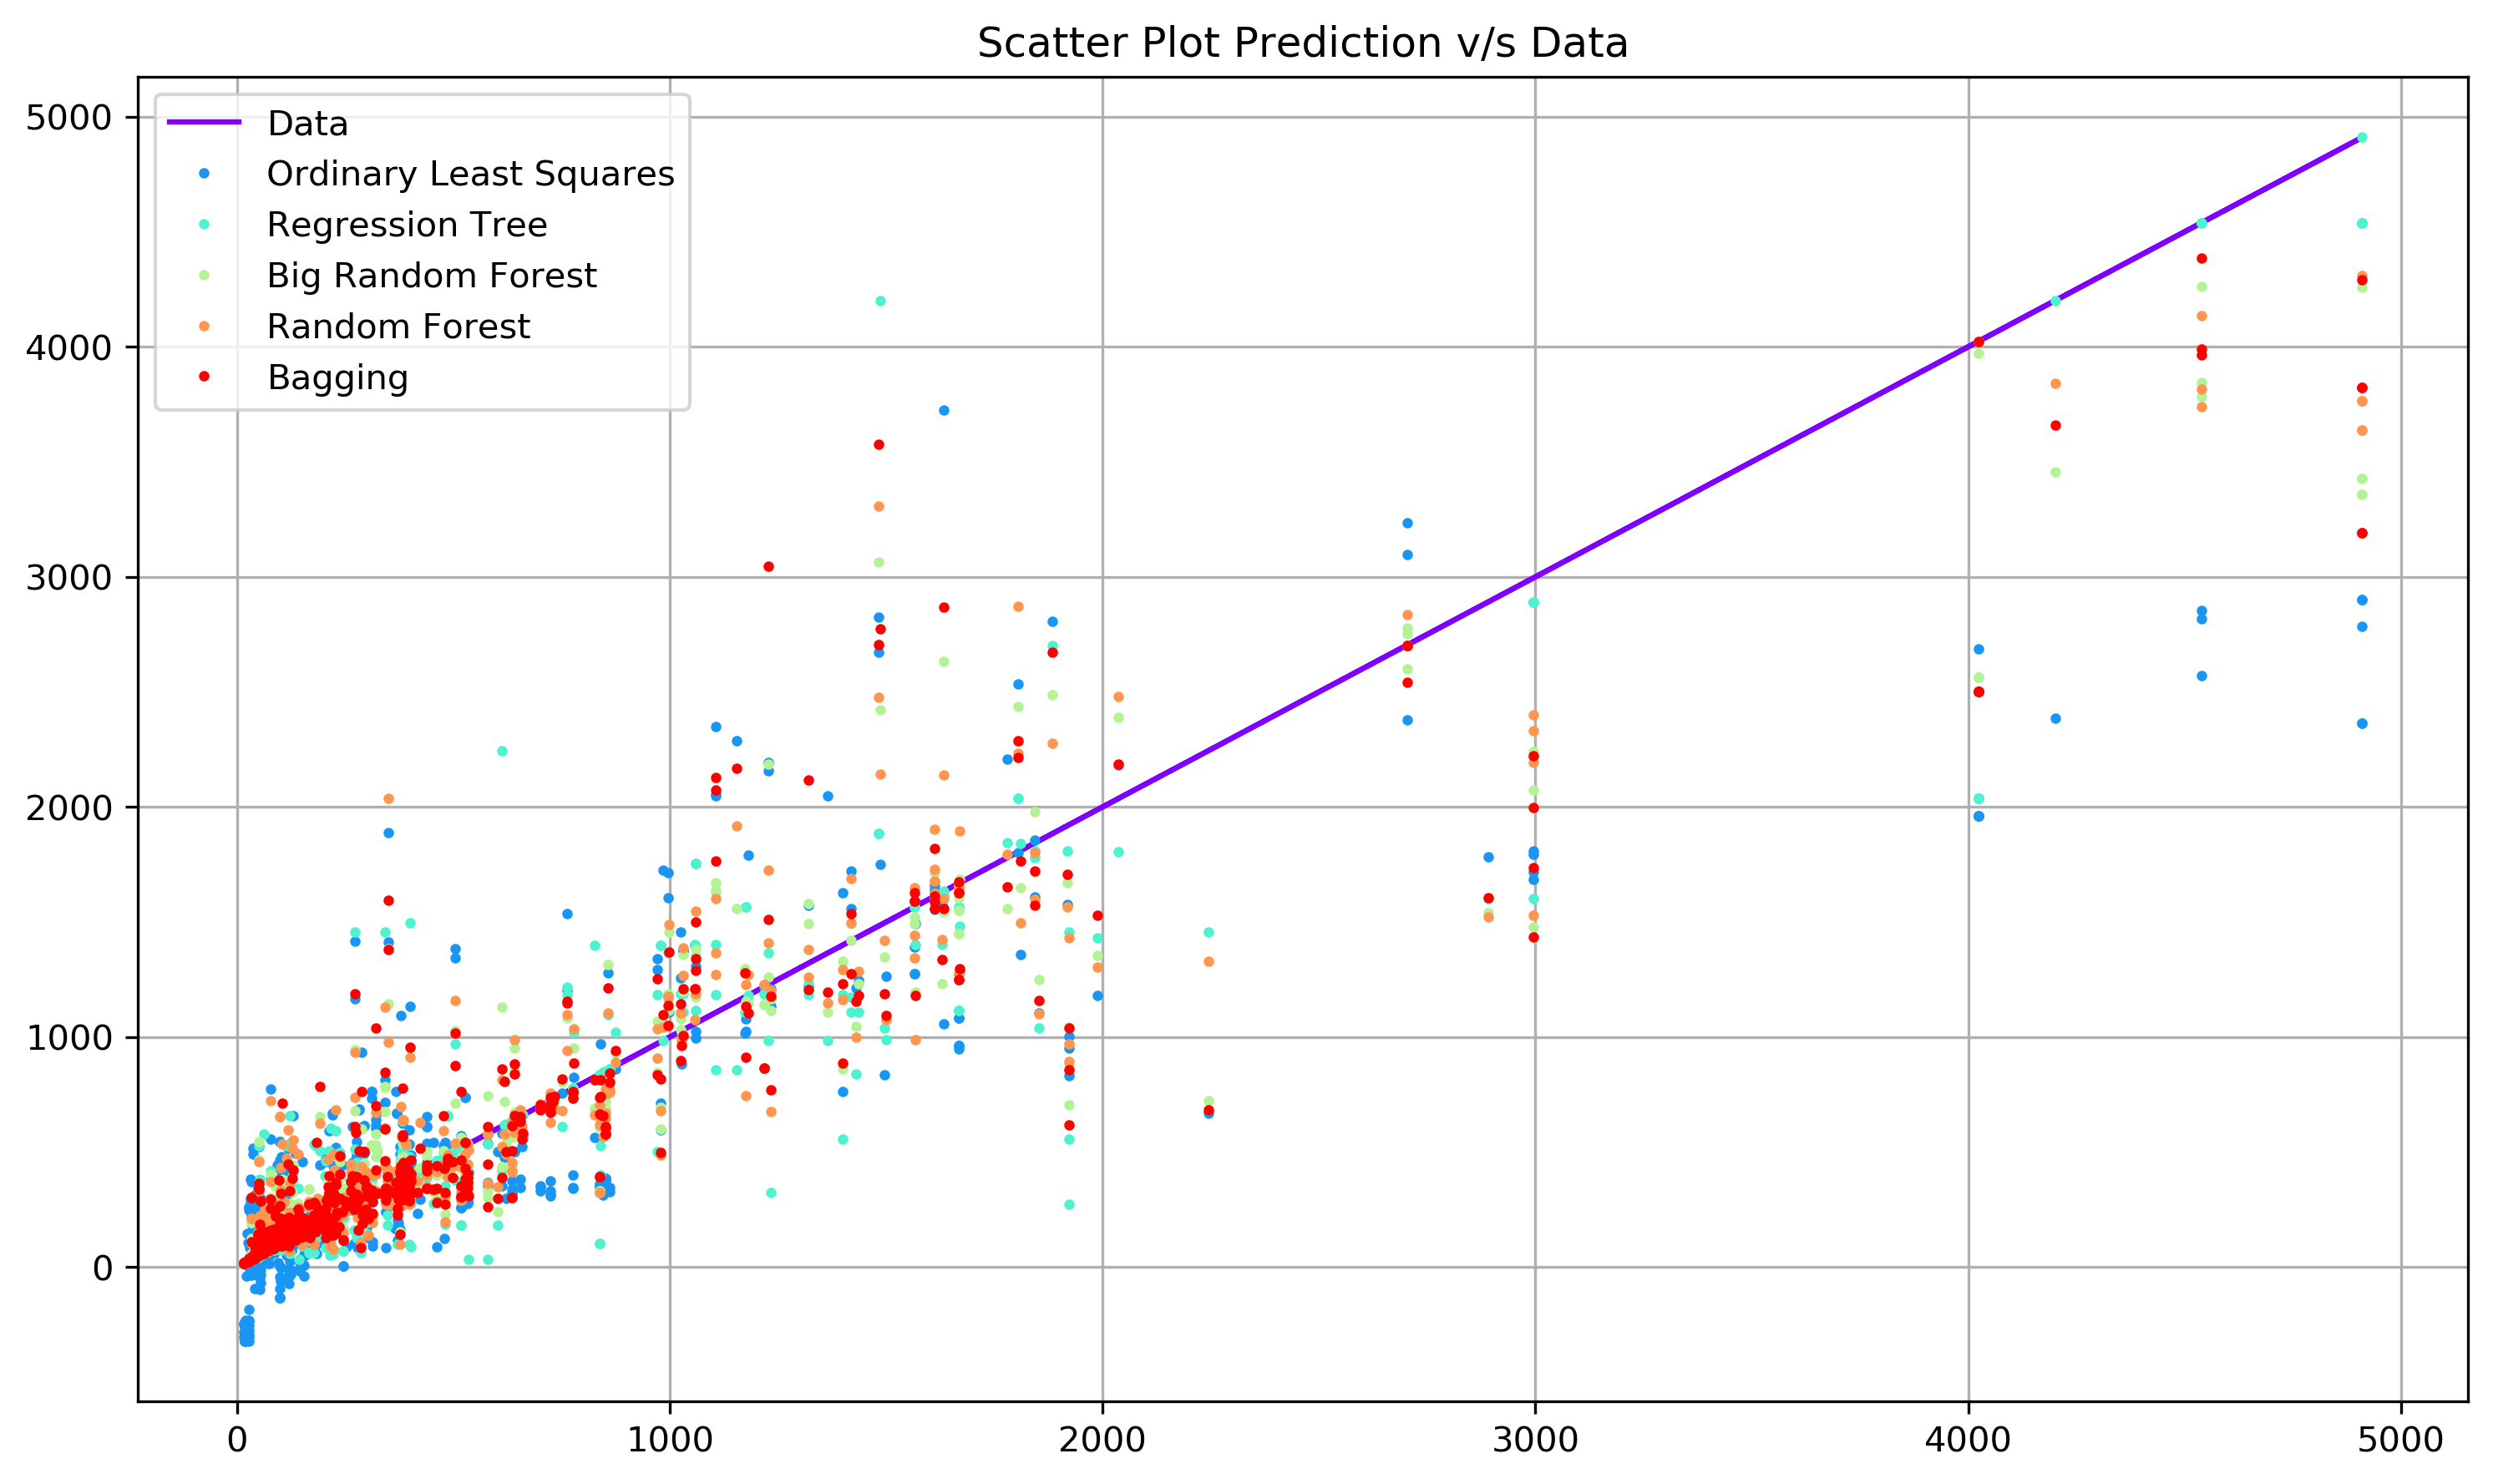

In [8]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
color=iter(cm.rainbow(np.linspace(0,1,len(experiments)+3)))
plt.figure(figsize=(12,7),dpi=300)
plt.plot(actuals,actuals,c=next(color),markersize=2,label='Data')
for _, row in DataFrame(experiments).iterrows():
    plt.plot(actuals, row["Predictions"],'o',c=next(color),
             markersize=2,label=row['Algorithm'])
plt.title('Scatter Plot Prediction v/s Data')
plt.grid(True)
plt.legend()
plt.show()

### More visualizations

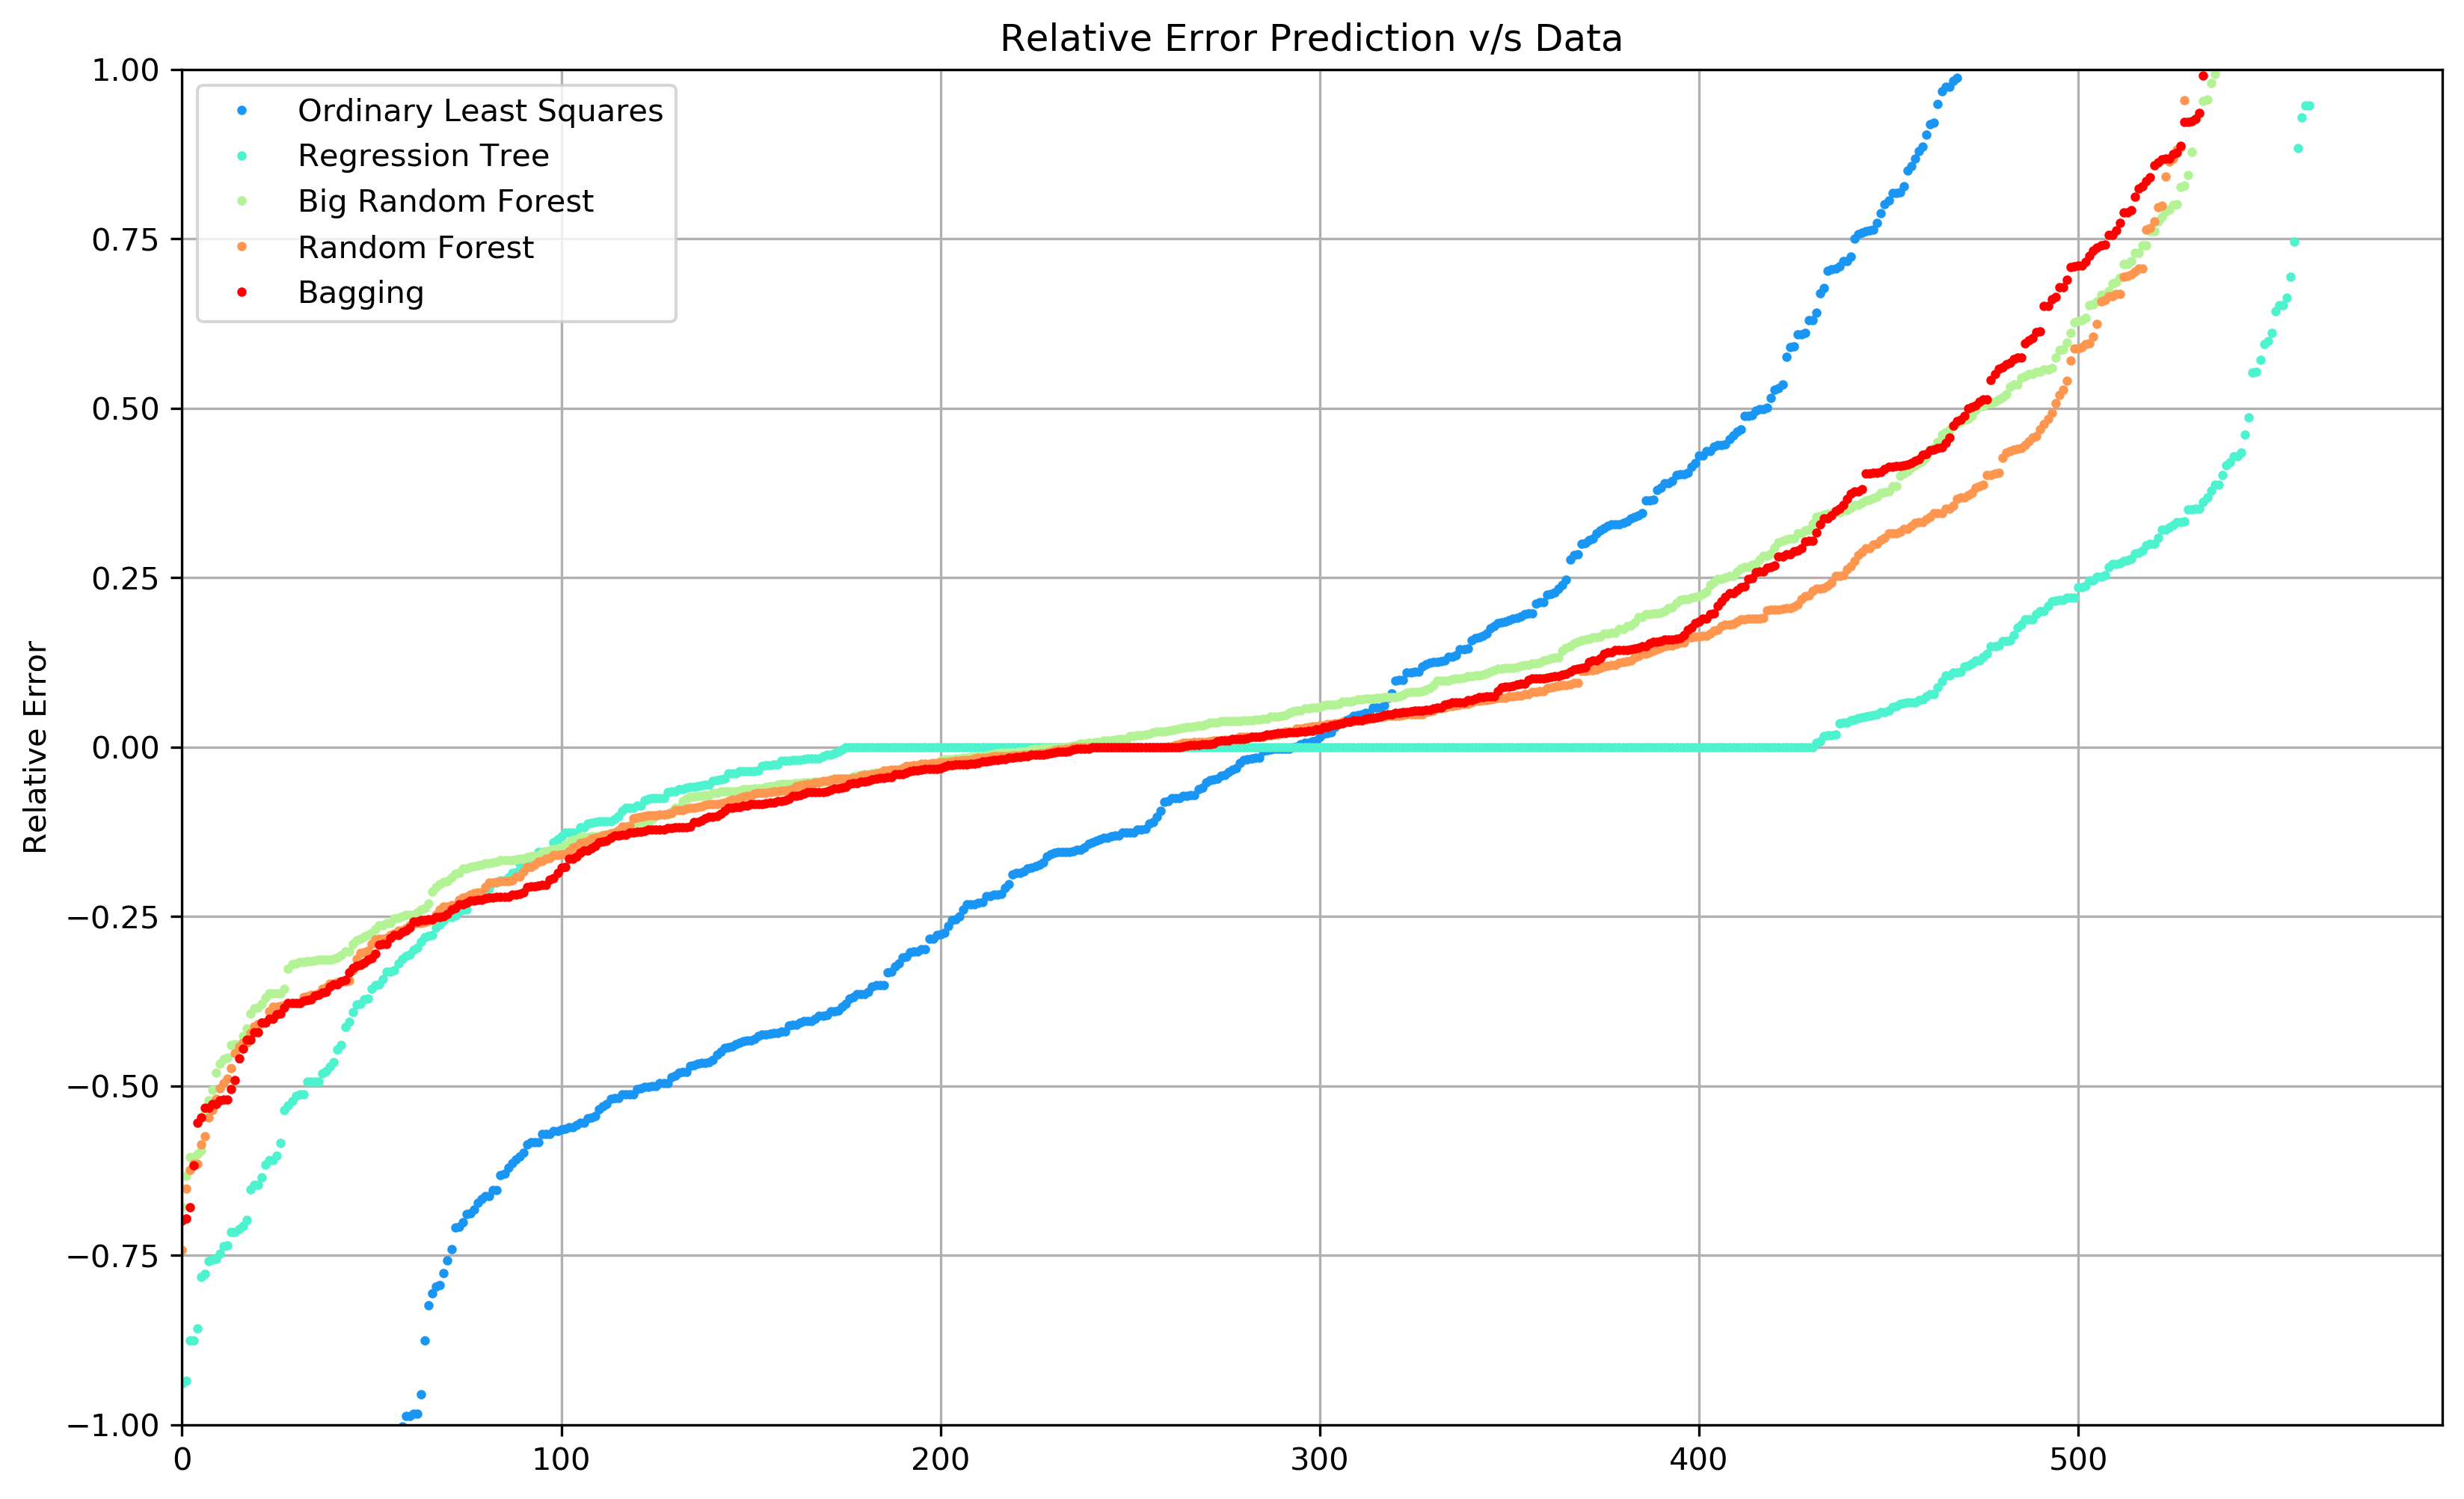

In [9]:
color=iter(cm.rainbow(np.linspace(0,1,len(experiments)+3)))
next(color)
plt.figure(figsize=(13,8),dpi=300)
for index, row in DataFrame(experiments).iterrows():
    relative_error = (row["Predictions"] - actuals) / (1 + abs(actuals))
    plt.plot(np.sort(relative_error),'o',c=next(color),
             markersize=2,label=row['Algorithm'])
plt.title('Relative Error Prediction v/s Data')
plt.ylabel('Relative Error')
plt.grid(True)
plt.legend()
plt.axis([0,len(actuals),-1,1])
plt.show()

### Even more visualizations

In [10]:
def boxplot(algorithm):
    prediction = (experiments["Predictions"]
                  [experiments["Algorithm"].index(algorithm)])
    plt.title(algorithm)
    plt.boxplot( (prediction - actuals) / (1 + abs(actuals))  )
    plt.show()

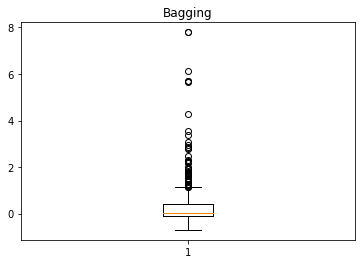

In [11]:
boxplot("Bagging")

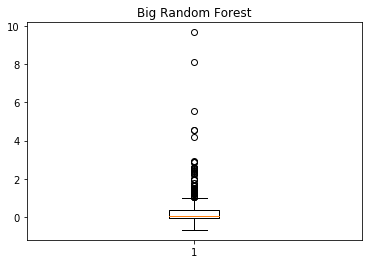

In [12]:
boxplot("Big Random Forest")

### Visualizations only take us so far

Let's use `model_selection.cross_val_score` to automate the process of train/test split based assessment. (K-Fold Cross Validation)



In [13]:
experiments["Results"] = []
for o in experiments["Objects"]:
    experiments["Results"].append(
        model_selection.cross_val_score(o(), y=df_hist['Sales'], 
                                        X=df_hist.drop("Sales", axis=1),
                                        cv=5).mean())

c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in versio

In [14]:
DataFrame(experiments).drop(["Objects", "Predictions"], 
                            axis=1).set_index("Algorithm")

,Results
Algorithm,
Ordinary Least Squares,0.536984
Regression Tree,0.712264
Big Random Forest,0.846854
Random Forest,0.801737
Bagging,0.856135


### Now use the complete historical table to create a predictor object with the best algorithm

In [15]:
fitted = (experiments["Objects"]
          [experiments["Algorithm"].index("Big Random Forest")]().
          fit(y=df_hist["Sales"], X=df_hist.drop("Sales", axis=1)))

### We will make predictions for the "Sales"-less table of current data

In [16]:
df_superbowl_original = pandas.read_excel("super_bowl_promotion_data.xlsx")
df_superbowl = get_dummies(df_superbowl_original, 
                           prefix={k:"dmy_%s"%k for k in categorical_columns},
                           columns = list(categorical_columns))
assert "Sales" not in df_superbowl.columns 
assert {"Sales"}.union(df_superbowl.columns).issubset(set(df_hist.columns))
len(df_superbowl)

36

Note that the current data table might have less categorical range than the historical data. 

In [17]:
for fld in set(df_hist.columns).difference(df_superbowl.columns, {"Sales"}):
    assert fld.startswith("dmy_")
    df_superbowl[fld] = 0

**Take care!!** `sklearn` [has no concept of columns](https://github.com/scikit-learn/scikit-learn/issues/7242). We make sure that the `df_superbowl` columns are ordered consistently with the `df_hist` independent column sub-matrix.

In [18]:
df_superbowl = df_superbowl[list(df_hist.drop("Sales", axis=1).columns)]

In [19]:
predicted = fitted.predict(df_superbowl)

# Prediction in hand, we commence optimization!

### LaTeX summary of family of equations

$$
\begin{array}{ll}
\max & sales\\
s.t. & X_{b,p}\in\{0,1\}\quad\forall (b,p)\in Prod\\
     & \sum\left(X_{b,p}:{(b,p)\in Prod} \right)=1\quad\forall b\in Soda\\
     & \sum\left(X_{b,p}:{(b,p)\in Prod, p\neq p_o, T(b)=t} \right) \leq max_t\quad\forall t\\
     & sales = \sum\left(f_{b,p} X_{b,p}:{(b,p)\in Prod}\right)\\
     & revenue = \sum\left(f_{b,p}  p X_{b,p}:{(b,p)\in Prod} \right)\\
     & investment = \sum\left(\left(f_{b,p} - f_{b,p_o}\right)_+ p_o X_{b,p}:{(b,p)\in Prod} \right)\\
     & investment <= max_{investment}
\end{array}
$$

### Putting the optimization input set together

In [20]:
forecast_sales = df_superbowl_original[["Product", "Cost Per Unit"]].copy()
forecast_sales["Sales"] = predicted
forecast_sales.set_index(['Product','Cost Per Unit'], inplace=True)

In [21]:
soda_family = {'11 Down': 'Clear', 'AB Root Beer': 'Dark', 
               'Alpine Stream': 'Clear', 'Bright': 'Clear', 
               'Crisp Clear': 'Clear', 'DC Kola': 'Dark',
               'Koala Kola': 'Dark', 'Mr. Popper': 'Dark', 
               'Popsi Kola': 'Dark'}
family  = set(soda_family[j] for j in soda_family)
soda    = set(j for j in soda_family)
max_prom = {f:2 for f in family}
max_investment = 750

In [22]:
product_prices = set(forecast_sales.index.values)
normal_price = {b:0 for b in soda}
for b,p in product_prices:
    normal_price[b] = max(normal_price[b],p)

Note that not all estimated discounts yield a boost in sales.

In [23]:
meaningful_discounts = 0
for b,p in product_prices:
    if forecast_sales.Sales[b,p] > forecast_sales.Sales[b,normal_price[b]]:
        meaningful_discounts += 1
meaningful_discounts, len(forecast_sales) - len(soda)

(20, 27)

### Building a MIP model

$$
\begin{array}{l}
X_{b,p}\in\{0,1\}\quad\forall (b,p)\in Prod\\
0 \leq sales\\
0 \leq revenue\\
0 \leq investment \leq max_{investment}
\end{array}
$$

In [24]:
import gurobipy as gu
model = gu.Model()
select_price = model.addVars(product_prices,vtype=gu.GRB.BINARY,name='X')
sales        = model.addVar(name='sales')
revenue      = model.addVar(name='revenue')
investment   = model.addVar(ub=max_investment, name='investment')
gusum = gu.quicksum

ModuleNotFoundError: No module named 'gurobipy'

$$ 
sales = \sum\left(f_{b,p} X_{b,p}:{(b,p)\in Prod}\right)\\
revenue = \sum\left(f_{b,p} p X_{b,p}:{(b,p)\in Prod} \right)\\
investment = \sum\left(\left(f_{b,p} - f_{b,p_o}\right)_+ p_o X_{b,p}:{(b,p)\in Prod} \right)
$$

In [ ]:
model.addConstr(sales == select_price.prod(forecast_sales.Sales), name='sales')
model.addConstr(revenue == gusum(forecast_sales.Sales[b,p] * p * 
                                 select_price[b,p] for b,p in product_prices), 
                name='revenue')
model.addConstr(investment == 
                gusum(max(0,forecast_sales.Sales[b,p] - 
                            forecast_sales.Sales[b,normal_price[b]]) *
                        normal_price[b] * select_price[b,p] 
                        for b,p in product_prices),
                name='investment')
model.update()

$$
\sum\left(X_{b,p}:{(b,p)\in Prod} \right)=1\quad\forall b\in Soda\\
\sum\left(X_{b,p}:{(b,p)\in Prod, p\neq p_o, T(b)=t} \right) \leq max_t
$$

In [ ]:
model.addConstrs((select_price.sum(b,'*') == 1 for b in soda), name='OnePrice')
model.addConstrs((gusum(select_price[b,p] for b,p in product_prices if 
                        soda_family[b] == f and p != normal_price[b] ) 
                  <= max_prom[f] for f in family),
                 name='MaxProm')
model.update()

### Optimize and results

In [ ]:
model.setObjective(sales, sense=gu.GRB.MAXIMIZE)
model.optimize()

In [ ]:
model.status == gu.GRB.OPTIMAL

### Only the paranoid survive
Carefully sanity check the solution.

In [ ]:
sales.X, revenue.X, investment.X

In [ ]:
price_selections = {"Product":[], "Price":[], "Is Discount":[], "Family":[]}
for b, p in product_prices:
    if abs(select_price[b,p].X -1) < 0.0001: # i.e. almost one
        price_selections["Product"].append(b)
        price_selections["Price"].append(p)
        price_selections["Is Discount"].append(p < normal_price[b])
        price_selections["Family"].append(soda_family[b])
(DataFrame(price_selections).set_index("Product")
 [["Price", "Is Discount", "Family"]].sort_values("Family"))

#### Create a range of predictions to simulate the behavior of our solution under a range of conditions.

In [ ]:
simulated_KPI = {'Sales':[],'Revenue':[],'Investment':[]}
Z = select_price
num_infeas = 0
for i in range(100):
    np.random.seed(i)
    fitted = RandomForestRegressor(n_estimators=100,
                                   n_jobs=4).fit(y=df_hist["Sales"],
                                                 X=df_hist.drop("Sales", axis=1))
    forecast = df_superbowl_original[['Product', 'Cost Per Unit']].copy()
    forecast["Sales"] = fitted.predict(df_superbowl)
    forecast = forecast.set_index(['Product','Cost Per Unit'])
    sales, revenue, investment = 0, 0, 0
    for b,p in product_prices:
        sales   += forecast.Sales[b,p] * Z[b,p].X
        revenue += forecast.Sales[b,p] * p * Z[b,p].X
        investment += (max(0,forecast.Sales[b,p] - 
                             forecast.Sales[b,normal_price[b]]) * 
                       normal_price[b] * Z[b,p].X)
    if investment > max_investment:
        num_infeas += 1
    simulated_KPI['Sales'].append(sales)
    simulated_KPI['Revenue'].append(revenue)
    simulated_KPI['Investment'].append(investment)

In [ ]:
data = {'Sales','Revenue','Investment'}
color=iter(cm.rainbow(np.linspace(0,1,3)))
for t in data:
    plt.figure(figsize=(7,4),dpi=300)
    plt.hist(simulated_KPI[t],50,normed=1,color=next(color), alpha=0.75)
    plt.ylabel('Probability')
    plt.xlabel(t)
    plt.grid(True)
    plt.show()

In [ ]:
num_infeas

## Thank you for joining us
 * If you haven't already done so, please register at http://www.gurobi.com/ and then visit http://www.gurobi.com/downloads/get-anaconda to try Gurobi and Python for yourself.
 * Explore ticdat at https://pypi.python.org/pypi/ticdat/ and see the Opalytics Cloud Platform in action at http://bit.ly/2sjEuZt. 
 * For questions about Gurobi Pricing contact sales@gurobi.com or sales@gurobi.de.
 * A recording of the webinar, including the slides, will be available in roughly one week.

# Some extra references for Stochastic, Robust, and Risk optimization

After the webinar we received a lot of requests for further material on this topic. The following list is an (incomplete) list of sources for these topics, but a good starting point for it.

## Books

<ul>
    <li>Stochastic Programming, Peter Kall, Stein W. Walace, 1994</li>
    <li>Optimization Methods in Finance, Gerard Cornuejols and Reha T&uuml;t&uuml;nc&uuml;, 2006</li>
    <li>Lectures on Stochastic Programming: Modeling and Theory, Alexander Shapiro, Darinka Dentcheva, Andrzej Ruszczy&nacute;ski, 2009</li>
    <li>Robust Optimization, Aharon Ben-Tal, Laurent El Ghaoui, Arkadi Nemirovski, 2009</li>
    <li>Introduction to Stochastic Programming, John Birge, Fran&ccedil;ois Louveaux, 2011</li>
    <li>Modeling with Stochastic Programming, Alan J. King, Stein W. Walace, 2012</li>
</ul>

## Some papers

<ul>
    <li>Optimization of Conditional Value-at-Risk, R. Tyrrell Rockafellar, Stanislav Uryasev, 2000</li>
    <li>Supplier-Retailer Flexible Commitments Contracts: A Robust Optimization Approach, Aharon Ben Tal , Boaz Golany, Arcadi Nemirovskiy, Jean-Philippe Vial, 2003</li>
    <li>Tractable Approximations to Robust Conic Optimization Problems,Dimitris Bertsimas, Melvyn Sim, 2006</li>
    <li>Modeling and optimization of risk, Pavlo Krokhmal, Michael Zabarankin,Stan Uryasev, 2011</li>
</ul>

## Other resources

The stochastic optimization society in their <a href="www.stoprog.org">web site</a> has several tutorials and further links.

### Special Thanks

I would like to specially thank (in alphabetic order) to
<a href="http://www2.isye.gatech.edu/people/faculty/Shabbir_Ahmed/">Shabbir Ahmed</a>, Georgia Tech, 
<a href="http://www.uai.cl/academicos/cuerpo-academico/tito-homem-de-mello">Tito Homem-de-mello</a>, Universidad Adolfo Iba&ntilde;ez, 
<a href="https://directory.engr.wisc.edu/ie/faculty/luedtke_james">Jim Luedtke</a>, University of Wisconsin-Madison,
<a href="http://www.mccormick.northwestern.edu/research-faculty/directory/profiles/morton-david.html">David Morton</a>,  Northwestern University, and
<a href="http://bernardokp.uai.cl/">Bernardo Pagnoncelli</a>, Universidad Adolfo Iba&ntilde;ez, for suggesting books, links and papers. Any omission or error is my fault.

Daniel Espinoza,<br>
Senior Developer,<br>
Gurobi Optimization Inc.
